# Confusion Matrix

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from PIL import Image


In [69]:
# Import train and test dataset
dataset = pd.read_csv("iris.csv", header=None)


dataset.head()

,0,1,2,3,4
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa


In [70]:
dataset.iloc[0,:].values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [71]:
names     = dataset.iloc[0,:].values
df        = pd.read_csv("iris.csv",names = names)
dataset1  = df.drop([0])
dataset1


,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [72]:

set_index_train = dataset1.index.values -1


In [73]:
indexedDataTrain = dataset1.set_index(pd.Index(set_index_train))

indexedDataTrain

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


C:\Users\Linda7lll\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


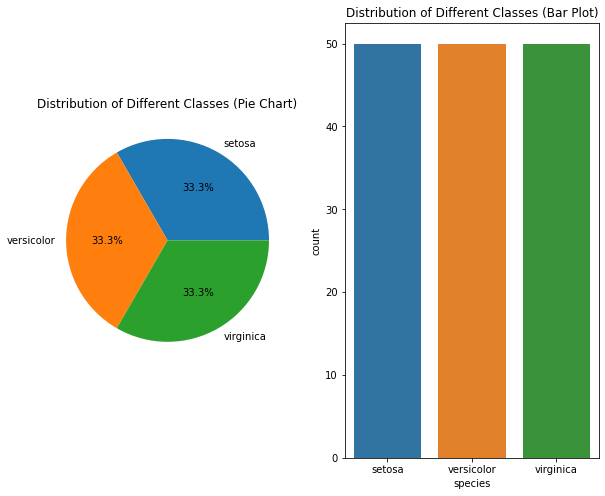

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

print(dataset1['species'].value_counts())

f,ax=plt.subplots(1,2,figsize=(10,8))
indexedDataTrain['species'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Distribution of Different Classes (Pie Chart)')
ax[0].set_ylabel('')
sns.countplot('species',data=dataset1,ax=ax[1])
ax[1].set_title('Distribution of Different Classes (Bar Plot)')
plt.show()

In [75]:
dataset1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [76]:
f_list = list(dataset1.columns)

In [77]:

from sklearn.model_selection import train_test_split

k =dataset1.loc[:, "species"]
y = list(k)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)

feature_names = f_list[0:4]
X = dataset1[feature_names].values
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state =0)
sc=StandardScaler()
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)



svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy : ', acc_svm*100)


Accuracy :  97.77777777777777


In [78]:
CM = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:  \n\n",CM)



Confusion Matrix:  

 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

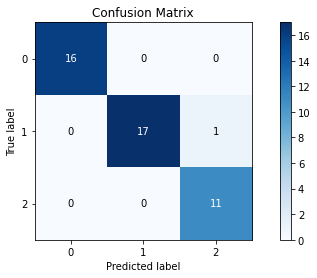

In [79]:
fig, ax = plt.subplots(figsize=(10,4))
plot_confusion_matrix(y_test, y_pred_svm, ax=ax)

<AxesSubplot:>

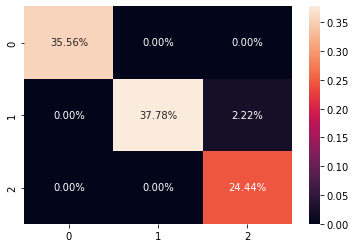

In [80]:
#%'lik oran
import seaborn as sns
sns.heatmap(CM/np.sum(CM), annot=True, fmt='.2%')

In [81]:
def statconf(CM):
    
    tot_sample  = np.sum(CM)
    L = len(CM)    
    acc = np.trace(CM) / tot_sample
    pre = np.zeros(L)
    rcl = np.zeros(L)
    f1s = np.zeros(L)
    
    for i in range(len(CM)):
        pre[i] = CM[i,i]/np.sum(CM[:,i])
        rcl[i] = CM[i,i]/np.sum(CM[i,:])
        f1s[i] = 2*pre[i]*rcl[i] / ( pre[i] + rcl[i] )
        
    return (acc , np.mean(pre) , np.mean(rcl) , np.mean(f1s))

xc = statconf(CM)
 
print("\n\n Accuracy : {:.4f} , Precision : {:.4f} , Recall : {:.4f} , F1-Score : {:.4f}".format( xc[0]*100 , xc[1]*100 , xc[2]*100 ,  xc[3]*100))




 Accuracy : 97.7778 , Precision : 97.2222 , Recall : 98.1481 , F1-Score : 97.5983


In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
print('accuracy  :{}'.format(accuracy_score(y_test, y_pred_svm)*100))
print('precision :{}'.format(precision_score(y_test, y_pred_svm, average= 'macro')*100))
print('recall    :{}'.format(recall_score(y_test, y_pred_svm, average= 'macro')*100))
print('F1 Score  :{}'.format(f1_score(y_test, y_pred_svm, average= 'macro')*100))



accuracy  :97.77777777777777
precision :97.22222222222221
recall    :98.14814814814815
F1 Score  :97.59834368530021
